In [1]:
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
import matplotlib as mpl
import seaborn as sns
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
import re
import math   
from scipy import stats
import random
import pickle

In [2]:
np.random.seed(42)
random.seed(42)

In [3]:
arm_dist_title = 'Arms Distribution={0.2, 0.8}'
cost = "1, in_factor=2, dec_factor=0.5"

In [4]:
df_10k_sim_1_exp_10_tree = pd.read_csv('./records_tests/test_record_10000_sim_1_exp_100_runs_10_tree.csv')
df_10k_sim_1_exp_5_tree = pd.read_csv('./records_tests/test_record_10000_sim_1_exp_100_runs_5_tree.csv')
df_1k_sim_1_exp_50_tree = pd.read_csv('./records_tests/test_record_1000_sim_1_exp_100_runs_50_tree.csv')
df_1k_sim_1_exp_100_tree = pd.read_csv('./records_tests/test_record_1000_sim_1_exp_100_runs_100_tree.csv')
df_100_sim_1_exp_50_tree = pd.read_csv('./records_tests/test_record_100_sim_1_exp_100_runs_50_tree.csv')

df_50_sim_1_exp_300_tree = pd.read_csv('./records_tests/test_record_50_sim_1_exp_100_runs_300_tree.csv')
df_100_sim_1_exp_200_tree = pd.read_csv('./records_tests/test_record_100_sim_1_exp_100_runs_200_tree.csv')
df_1k_sim_1_exp_500_tree = pd.read_csv('./records_tests/test_record_1000_sim_1_exp_100_runs_500_tree.csv')

df_1k_sim_1_exp_20_tree = pd.read_csv('./records_tests/test_record_1000_sim_1_exp_100_runs_20_tree.csv')
df_1k_sim_100_exp_50_tree = pd.read_csv('./records_tests/test_record_1000_sim_100_exp_100_runs_50_tree.csv')

df_1k_sim_1_exp_10_tree = pd.read_csv('./records_tests/test_record_1000_sim_1_exp_100_runs_10_tree.csv')
df_10k_sim_1_exp_20_tree = pd.read_csv('./records_tests/test_record_10000_sim_1_exp_100_runs_20_tree.csv')

**Checking query probability**

In [5]:
df_10k_sim_1_exp_10_tree.query_cost.value_counts()

1.0    49998
2.0        2
Name: query_cost, dtype: int64

In [6]:
df_10k_sim_1_exp_5_tree.query_cost.value_counts()

1.0    50000
Name: query_cost, dtype: int64

In [7]:
df_1k_sim_1_exp_50_tree.query_cost.value_counts()

1.0    49951
2.0       47
4.0        2
Name: query_cost, dtype: int64

In [5]:
df_1k_sim_1_exp_100_tree.query_cost.value_counts()

1.0    49916
2.0       81
4.0        3
Name: query_cost, dtype: int64

In [8]:
df_100_sim_1_exp_50_tree.query_cost.value_counts()

1.0    49941
2.0       57
4.0        2
Name: query_cost, dtype: int64

In [6]:
df_50_sim_1_exp_300_tree.query_cost.value_counts()

1.0    48314
2.0     1654
4.0       31
8.0        1
Name: query_cost, dtype: int64

In [7]:
df_100_sim_1_exp_200_tree.query_cost.value_counts()

1.0    49670
2.0      314
4.0       14
8.0        2
Name: query_cost, dtype: int64

In [5]:
df_1k_sim_1_exp_500_tree.query_cost.value_counts()

1.0    49572
2.0      412
4.0       15
8.0        1
Name: query_cost, dtype: int64

In [5]:
df_1k_sim_1_exp_20_tree.query_cost.value_counts()

1.0    49991
2.0        9
Name: query_cost, dtype: int64

In [6]:
df_1k_sim_100_exp_50_tree.query_cost.value_counts()

1.0    49992
2.0        8
Name: query_cost, dtype: int64

In [5]:
df_1k_sim_1_exp_10_tree.query_cost.value_counts()

1.0    49998
2.0        2
Name: query_cost, dtype: int64

In [5]:
df_10k_sim_1_exp_20_tree.query_cost.value_counts()

1.0    49991
2.0        9
Name: query_cost, dtype: int64

<AxesSubplot:xlabel='timestep'>

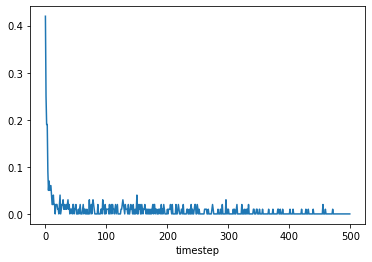

In [6]:
df_1k_sim_1_exp_500_tree.groupby(by=['timestep']).mean()['query_ind'].plot()

### Looks like almost no querying at all \
## Maybe there is an information leakage to MCTS??

In [7]:
random_runs = np.random.choice(a=np.array(range(100)), replace=False, size=(30))

**Sanity check: Check no overlap runs**

In [8]:
random_runs.shape

(30,)

In [9]:
len(set(random_runs))

30

In [10]:
df = df_10k_sim_1_exp_10_tree[df_10k_sim_1_exp_10_tree['run'].isin(random_runs)]
df.run.unique().shape

(30,)

In [11]:
df_2 = df_10k_sim_1_exp_10_tree[df_10k_sim_1_exp_5_tree['run'].isin(random_runs)]
df_3 = df_1k_sim_1_exp_50_tree[df_1k_sim_1_exp_50_tree['run'].isin(random_runs)]
df_4 = df_1k_sim_1_exp_100_tree[df_1k_sim_1_exp_100_tree['run'].isin(random_runs)]
df_5 = df_100_sim_1_exp_50_tree[df_100_sim_1_exp_50_tree['run'].isin(random_runs)]

df_6 = df_50_sim_1_exp_300_tree[df_100_sim_1_exp_50_tree['run'].isin(random_runs)]
df_7 = df_100_sim_1_exp_200_tree[df_100_sim_1_exp_50_tree['run'].isin(random_runs)]
df_8 = df_1k_sim_1_exp_500_tree[df_100_sim_1_exp_50_tree['run'].isin(random_runs)]


### Avg. Reward per Timestep

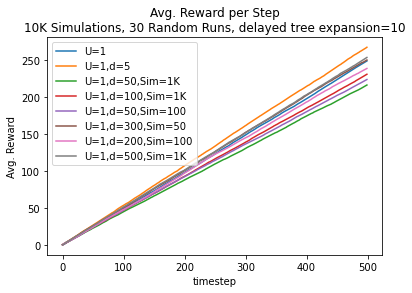

In [12]:
ax = df.groupby(['timestep']).mean()['reward'].expanding().sum().plot(
        title='Avg. Reward per Step\n10K Simulations, 30 Random Runs, delayed tree expansion=10', xlabel='Step', ylabel='Avg. Reward', label='U=1')
df_2.groupby(['timestep']).mean()['reward'].expanding().sum().plot(ax=ax, label='U=1,d=5')
df_3.groupby(['timestep']).mean()['reward'].expanding().sum().plot(ax=ax, label='U=1,d=50,Sim=1K')
df_4.groupby(['timestep']).mean()['reward'].expanding().sum().plot(ax=ax, label='U=1,d=100,Sim=1K')
df_5.groupby(['timestep']).mean()['reward'].expanding().sum().plot(ax=ax, label='U=1,d=50,Sim=100')

df_6.groupby(['timestep']).mean()['reward'].expanding().sum().plot(ax=ax, label='U=1,d=300,Sim=50')
df_7.groupby(['timestep']).mean()['reward'].expanding().sum().plot(ax=ax, label='U=1,d=200,Sim=100')
df_8.groupby(['timestep']).mean()['reward'].expanding().sum().plot(ax=ax, label='U=1,d=500,Sim=1K')

ax.legend()
plt.show()

## Check arms convergence

In [14]:
df_10k_sim_1_exp_10_tree.groupby('run').mean()['chosen_arm'].round(0).value_counts()

1.0    54
0.0    46
Name: chosen_arm, dtype: int64

In [15]:
df_10k_sim_1_exp_5_tree.groupby('run').mean()['chosen_arm'].round(0).value_counts()

1.0    52
0.0    48
Name: chosen_arm, dtype: int64

In [16]:
df_1k_sim_1_exp_50_tree.groupby('run').mean()['chosen_arm'].round(0).value_counts()

0.0    57
1.0    43
Name: chosen_arm, dtype: int64

In [14]:
df_1k_sim_1_exp_100_tree.groupby('run').mean()['chosen_arm'].round(0).value_counts()

0.0    50
1.0    50
Name: chosen_arm, dtype: int64

In [17]:
df_100_sim_1_exp_50_tree.groupby('run').mean()['chosen_arm'].round(0).value_counts()

0.0    56
1.0    44
Name: chosen_arm, dtype: int64

In [18]:
df_50_sim_1_exp_300_tree.groupby('run').mean()['chosen_arm'].round(0).value_counts()

1.0    51
0.0    49
Name: chosen_arm, dtype: int64

In [19]:
df_100_sim_1_exp_200_tree.groupby('run').mean()['chosen_arm'].round(0).value_counts()

0.0    54
1.0    46
Name: chosen_arm, dtype: int64

In [15]:
df_1k_sim_1_exp_500_tree.groupby('run').mean()['chosen_arm'].round(0).value_counts()

0.0    50
1.0    50
Name: chosen_arm, dtype: int64

In [7]:
df_1k_sim_1_exp_20_tree.groupby('run').mean()['chosen_arm'].round(0).value_counts()

0.0    62
1.0    38
Name: chosen_arm, dtype: int64

In [8]:
df_1k_sim_100_exp_50_tree.groupby('run').mean()['chosen_arm'].round(0).value_counts()

0.0    53
1.0    47
Name: chosen_arm, dtype: int64

In [6]:
df_1k_sim_1_exp_10_tree.groupby('run').mean()['chosen_arm'].round(0).value_counts()

1.0    56
0.0    44
Name: chosen_arm, dtype: int64

In [6]:
df_10k_sim_1_exp_20_tree.groupby('run').mean()['chosen_arm'].round(0).value_counts()

0.0    61
1.0    39
Name: chosen_arm, dtype: int64

## Avg. Regret

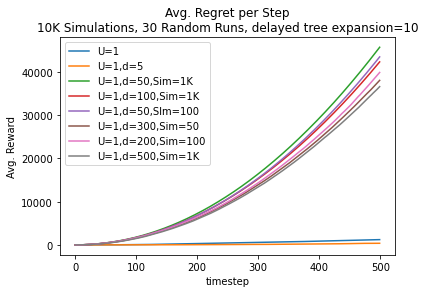

In [17]:
ax = df.groupby(['timestep']).mean()['regret'].expanding().sum().plot(
        title='Avg. Regret per Step\n10K Simulations, 30 Random Runs, delayed tree expansion=10', xlabel='Step', ylabel='Avg. Reward', label='U=1')
df_2.groupby(['timestep']).mean()['regret'].expanding().sum().plot(ax=ax, label='U=1,d=5')
df_3.groupby(['timestep']).mean()['regret'].expanding().sum().plot(ax=ax, label='U=1,d=50,Sim=1K')
df_4.groupby(['timestep']).mean()['regret'].expanding().sum().plot(ax=ax, label='U=1,d=100,Sim=1K')
df_5.groupby(['timestep']).mean()['regret'].expanding().sum().plot(ax=ax, label='U=1,d=50,SIm=100')

df_6.groupby(['timestep']).mean()['regret'].expanding().sum().plot(ax=ax, label='U=1,d=300,Sim=50')
df_7.groupby(['timestep']).mean()['regret'].expanding().sum().plot(ax=ax, label='U=1,d=200,Sim=100')
df_8.groupby(['timestep']).mean()['regret'].expanding().sum().plot(ax=ax, label='U=1,d=500,Sim=1K')

ax.legend()
plt.show()

# Trying to compare with Sveta's

In [7]:
#only for KG and MCCH
def plot_cum_reg_and_arms (df_KG, df_MCCH, horizon, runs, mus, labels = ('MCCH', 'KG')):
    cregret_kg = []
    cregret_mcch = []
    cregret_kg_mean = []
    cregret_mcch_meam = []
    arms_kg = []
    arms_mcch = []
    
    for i in range(runs):
        temp_row_kg = []
        temp_row_mcch = []
        
        
        run_i_kg =  df_KG.loc[df_KG['run'] == i]
        run_i_mcch = df_MCCH.loc[df_MCCH['run'] == i]
        
        run_i_arm_count_kg = list(run_i_kg['arm'].value_counts().reindex(df_KG.arm.unique(), fill_value = 0).sort_index())
        run_i_arm_count_mcch = list(run_i_mcch['arm'].value_counts().reindex(df_MCCH.arm.unique(), fill_value = 0).sort_index())
        
        last_saved_iter_kg = run_i_kg.loc[run_i_kg['iter'] != (horizon -1)]['iter'].max()
        last_saved_iter_mcch = run_i_mcch.loc[run_i_mcch['iter'] != (horizon -1)]['iter'].max()
        
        
        run_i_cregret_kg = list(run_i_kg['regret'])
        run_i_cregret_mcch = list(run_i_mcch['regret'])
        
        
        runi_chosen_arm_kg = int(run_i_kg.loc[run_i_kg['iter']==(horizon-1)].arm)
        runi_chosen_arm_mcch = int(run_i_mcch.loc[run_i_mcch['iter']==(horizon-1)].arm)
        
        run_i_arm_count_kg[runi_chosen_arm_kg] = horizon - sum(run_i_arm_count_kg) + run_i_arm_count_kg[runi_chosen_arm_kg]
        run_i_arm_count_mcch[runi_chosen_arm_mcch] = horizon - sum(run_i_arm_count_mcch) + run_i_arm_count_mcch[runi_chosen_arm_mcch]
        
        arms_kg.append(run_i_arm_count_kg)
        arms_mcch.append(run_i_arm_count_mcch)
    
        
        complete_kg = np.linspace(run_i_cregret_kg[-2], run_i_cregret_kg[-1], (horizon - last_saved_iter_kg))
        complete_mcch = np.linspace(run_i_cregret_mcch[-2], run_i_cregret_mcch[-1], (horizon - last_saved_iter_mcch))
        
        cregret_kg_full = np.append(run_i_cregret_kg[:last_saved_iter_kg], complete_kg)
        cregret_mcch_full = np.append(run_i_cregret_mcch[:last_saved_iter_mcch], complete_mcch)
        
        cregret_kg.append(cregret_kg_full)
        cregret_mcch.append(cregret_mcch_full)

        
    
    cregret_kg_tran = np.array(cregret_kg).transpose()
    cregret_mcch_tran = np.array(cregret_mcch).transpose()
    
    
    sem_cregret_kg = []
    sem_cregret_mcch = []
    
    
    for kg_item, mcch_item in zip(cregret_kg_tran, cregret_mcch_tran):
        cregret_kg_mean.append(kg_item.mean()) 
        cregret_mcch_meam.append(mcch_item.mean())
        sem_cregret_kg.append(stats.sem(kg_item))
        sem_cregret_mcch.append(stats.sem(mcch_item))
    
    print()
    np_cregret_kg_mean = np.array(cregret_kg_mean)
    np_cregret_mcch_mean = np.array(cregret_mcch_meam)
    
    np_sem_cregret_kg = np.array(sem_cregret_kg)
    np_sem_cregret_mcch = np.array(sem_cregret_mcch)
    

    arms_avg_kg = list(np.mean(arms_kg, axis=0))
    arms_avg_mcch = list(np.mean(arms_mcch, axis=0))

    print(arms_avg_kg)
    

    print("kg:", arms_avg_kg)
    print("mcch:", arms_avg_mcch)

    
    #===================PLOTs====================
    rng = np.arange(horizon)
    
    fig = plt.figure(figsize=(12,6))
    grid = plt.GridSpec(1,2)
    cregret_plot = fig.add_subplot(grid[0,0])
    arms_hist = fig.add_subplot(grid[0,1])
    
    cregret_plot.plot(rng, cregret_mcch_meam, label =labels[0])
    cregret_plot.plot(rng, cregret_kg_mean, label = labels[1])
    
    cregret_plot.fill_between(rng, np_cregret_mcch_mean + np_sem_cregret_mcch, np_cregret_mcch_mean - np_sem_cregret_mcch, alpha=0.1)
    cregret_plot.fill_between(rng, np_cregret_kg_mean + np_sem_cregret_kg, np_cregret_kg_mean - np_sem_cregret_kg, alpha=0.1)

    cregret_plot.set_title('Cumulative Regret')
    cregret_plot.set_xlabel('time steps')
    cregret_plot.set_ylabel('average cumulative regret')
    cregret_plot.legend()   #plt.legend()

    
    arms_np = np.arange(len(arms_avg_kg))
    print(arms_np)
    width = 0.35 

    arms_hist.bar(arms_np+width/2, arms_avg_mcch, width = 0.35,  label="chosen arms")
    arms_hist.bar(arms_np-width/2, arms_avg_kg, width = 0.35, label="chosen arms")
    arms_hist.set_xticks(arms_np)
    arms_hist.set_ylabel("average number of arms")


    arms_hist.set_title('Average Chosen Actions (arms)')
    
    plt.savefig('testplot.png')

In [8]:
res = pd.read_csv("./svetas/500iter_runs_alpha01_2arms_02_08_results_2021_12_05-11_38_24.csv")
res_sum = pd.read_csv("./svetas/500iter_runs_alpha01_2arms_02_08_summary_2021_12_05-11_38_24.csv")

In [9]:
KG_res = res.loc[(res ['policy'] == 'knowledgeGradientPolicy')]
MCCH_res = res.loc[(res['policy'] == 'MCCH')]


[51.3, 448.7]
kg: [51.3, 448.7]
mcch: [2.25, 497.75]
[0 1]


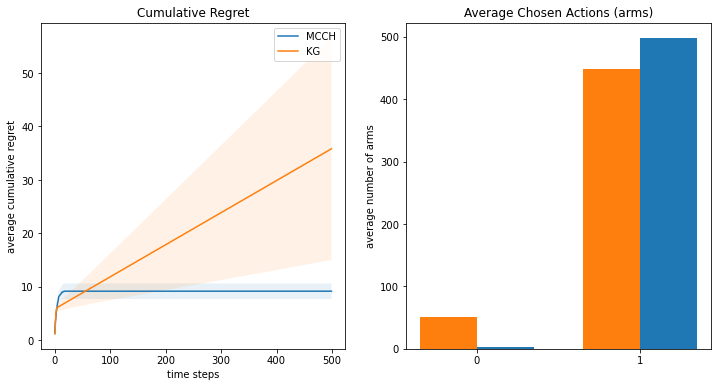

In [10]:
plot_cum_reg_and_arms(KG_res, MCCH_res, 500, 20, '[0.2, 0.8]')

In [11]:
MCCH_res

,run,iter,policy,mus,init_cost,increase_by,horizon,regret,arm,query_history,last_query_step,cum_number_of_queries
280,0,0,MCCH,"[0.2, 0.8]",1,2,500,1.6,0,1,0,1
281,0,1,MCCH,"[0.2, 0.8]",1,2,500,3.6,1,1,1,2
282,0,2,MCCH,"[0.2, 0.8]",1,2,500,3.6,1,0,1,2
283,0,3,MCCH,"[0.2, 0.8]",1,2,500,4.6,1,1,3,3
284,0,4,MCCH,"[0.2, 0.8]",1,2,500,4.6,1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
617,19,14,MCCH,"[0.2, 0.8]",1,2,500,17.4,1,0,7,6
618,19,15,MCCH,"[0.2, 0.8]",1,2,500,17.4,1,0,7,6
619,19,16,MCCH,"[0.2, 0.8]",1,2,500,17.4,1,0,7,6
620,19,17,MCCH,"[0.2, 0.8]",1,2,500,17.4,1,0,7,6


In [12]:
keep_iters = MCCH_res.iter.unique().tolist()
keep_runs = MCCH_res.run.unique().tolist()
print(len(keep_iters))
print(len(keep_runs))

29
20


In [13]:
BAMCPP_res = df_1k_sim_1_exp_20_tree.rename(columns={'chosen_arm': 'arm', 'timestep': 'iter'})
BAMCPP_res = BAMCPP_res[BAMCPP_res.run.isin(keep_runs)]
BAMCPP_res = BAMCPP_res[BAMCPP_res.iter.isin(keep_iters)]
BAMCPP_res

,run,iter,mus,base_query_cost,query_cost,horizon,regret,arm,query_ind,reward,seed
0,12,0,"(0.2, 0.8)",1,1.0,500,-0.2,1,0,1,12
1,15,0,"(0.2, 0.8)",1,1.0,500,0.8,1,0,0,15
2,14,0,"(0.2, 0.8)",1,1.0,500,-0.2,1,0,1,14
4,4,0,"(0.2, 0.8)",1,1.0,500,0.8,0,0,0,4
5,2,0,"(0.2, 0.8)",1,1.0,500,-0.2,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
15640,18,499,"(0.2, 0.8)",1,1.0,500,298.0,0,0,0,18
15678,8,499,"(0.2, 0.8)",1,1.0,500,309.0,0,0,0,8
15743,5,499,"(0.2, 0.8)",1,1.0,500,307.0,0,0,0,5
15751,12,499,"(0.2, 0.8)",1,1.0,500,287.0,0,0,0,12


In [14]:
print(len(BAMCPP_res.iter.unique().tolist()))
print(len(BAMCPP_res.run.unique().tolist()))

29
20



[373.9, 126.1]
kg: [373.9, 126.1]
mcch: [2.25, 497.75]
[0 1]


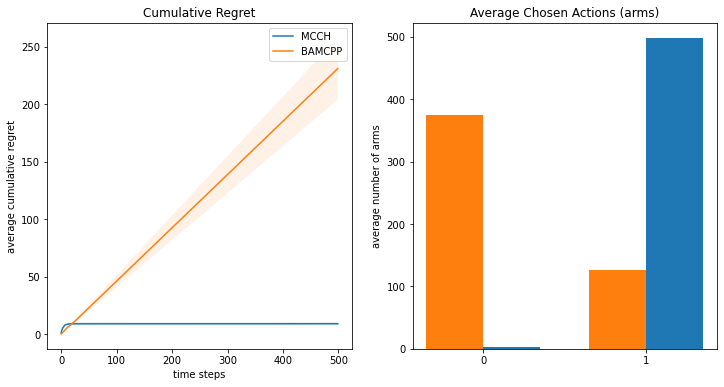

In [15]:
plot_cum_reg_and_arms(BAMCPP_res, MCCH_res, 500, 20, '[0.2, 0.8]', labels=('MCCH', 'BAMCPP'))


[202.55, 297.45]
kg: [202.55, 297.45]
mcch: [51.3, 448.7]
[0 1]


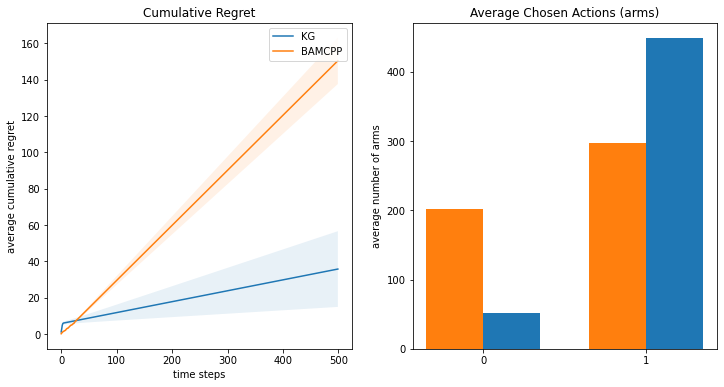

In [28]:
plot_cum_reg_and_arms(BAMCPP_res, KG_res, 500, 20, '[0.2, 0.8]', labels=('KG', 'BAMCPP'))